# <center> Classification of bank customers
<center> <img src="https://w10.naukri.com/mailers/2021/naukri-learning/oct/27oct/What-is-Consumer-Banking.jpg" width="438" height="246">

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Part 1. Data Collection, Data Cleaning (Missing Values, Handling Outliers)

In [2]:
# Data Collection

df = pd.read_csv('/home/mike/Documents/Coding/Data/bank_fin.csv', sep = ';')
display(df.head(3))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [4]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11137,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,3802,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,0 $,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,774,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [5]:
# Missing values

null_data = df.isnull().sum()
display(null_data[null_data > 0])

balance    25
dtype: int64

In [6]:
# Missing values in the 'job' column

df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

there are 70 'unknown' cells in 'job'

In [7]:
# Convert 'balance' into a float

df['balance'] = df['balance'].astype('str')
df['balance'] = df['balance'].str.replace('$', '')
df['balance'] = df['balance'].str.replace(' ', '')
df['balance'] = df['balance'].str.replace(',', '.').astype('float')


In [8]:
# Check the mean balance

round(df['balance'].mean(), 3)

1529.129

In [9]:
# Fill the missing values in 'balance' with the median

df['balance'] = df['balance'].fillna(df['balance'].median())

In [10]:
# Check the mean balance

round(df['balance'].mean(), 3)

1526.936

In [11]:
# Replace 'unknown' in 'job' and 'education' with the moda values

df["job"] = df["job"].replace({"unknown":"management"})
df["education"] = df["education"].replace({"unknown":"secondary"})

In [12]:
# See the mean balance for the clients that are both managers and have secondary education

mask = df[(df['job'] == 'management') & (df['education'] == 'secondary')]
round(mask['balance'].mean(), 3)

1598.883

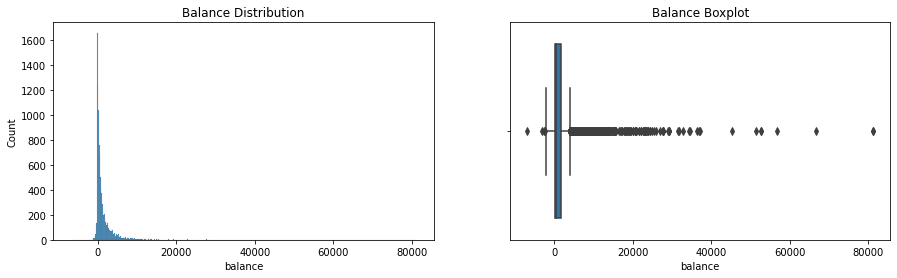

In [13]:
# See the stats of the 'balance'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
histplot.set_title('Balance Distribution');
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');

In [14]:
# Remove outliers in the 'balance' using the Tukey method

# create the outliers_iqr() function
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    print(f'The lower bound based on the Tukey method is {round(lower_bound)}')
    print(f'The upper bound based on the Tukey method is {round(upper_bound)}')
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# apply the outliers_iqr() function to 'balance' and display the quantiles
outliers, cleaned = outliers_iqr(df, 'balance')

The lower bound based on the Tukey method is -2241
The upper bound based on the Tukey method is 4063


In [15]:
# Remove all outliers and save the result in the 'cleaned_df'

cleaned_df = df.drop(outliers.index, axis=0)
cleaned_df.shape

(10105, 17)

## Part 2: Exploratory Data Analysis

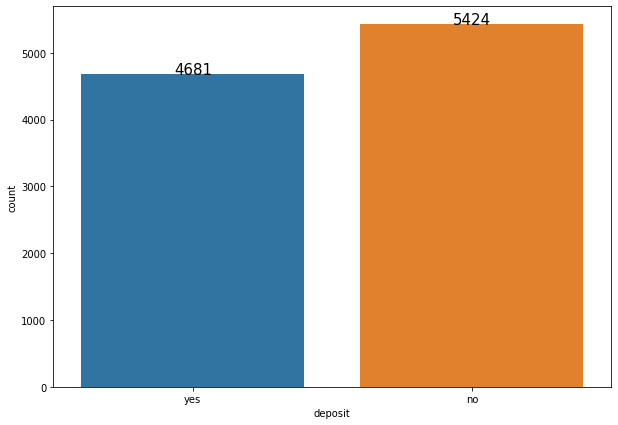

In [16]:
# Check if the data is well-balanced in terms of the target value - 'deposit'

countplt, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(data=cleaned_df, x='deposit')

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height()+0.75,rect.get_height(),horizontalalignment='center', fontsize = 15)
countplt;

In [17]:
# Descre statistics for numeric values

cleaned_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


In [18]:
# Descre statistics for categorical values

cleaned_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


In [19]:
# Create a copy of the dataframe

data = cleaned_df.copy()

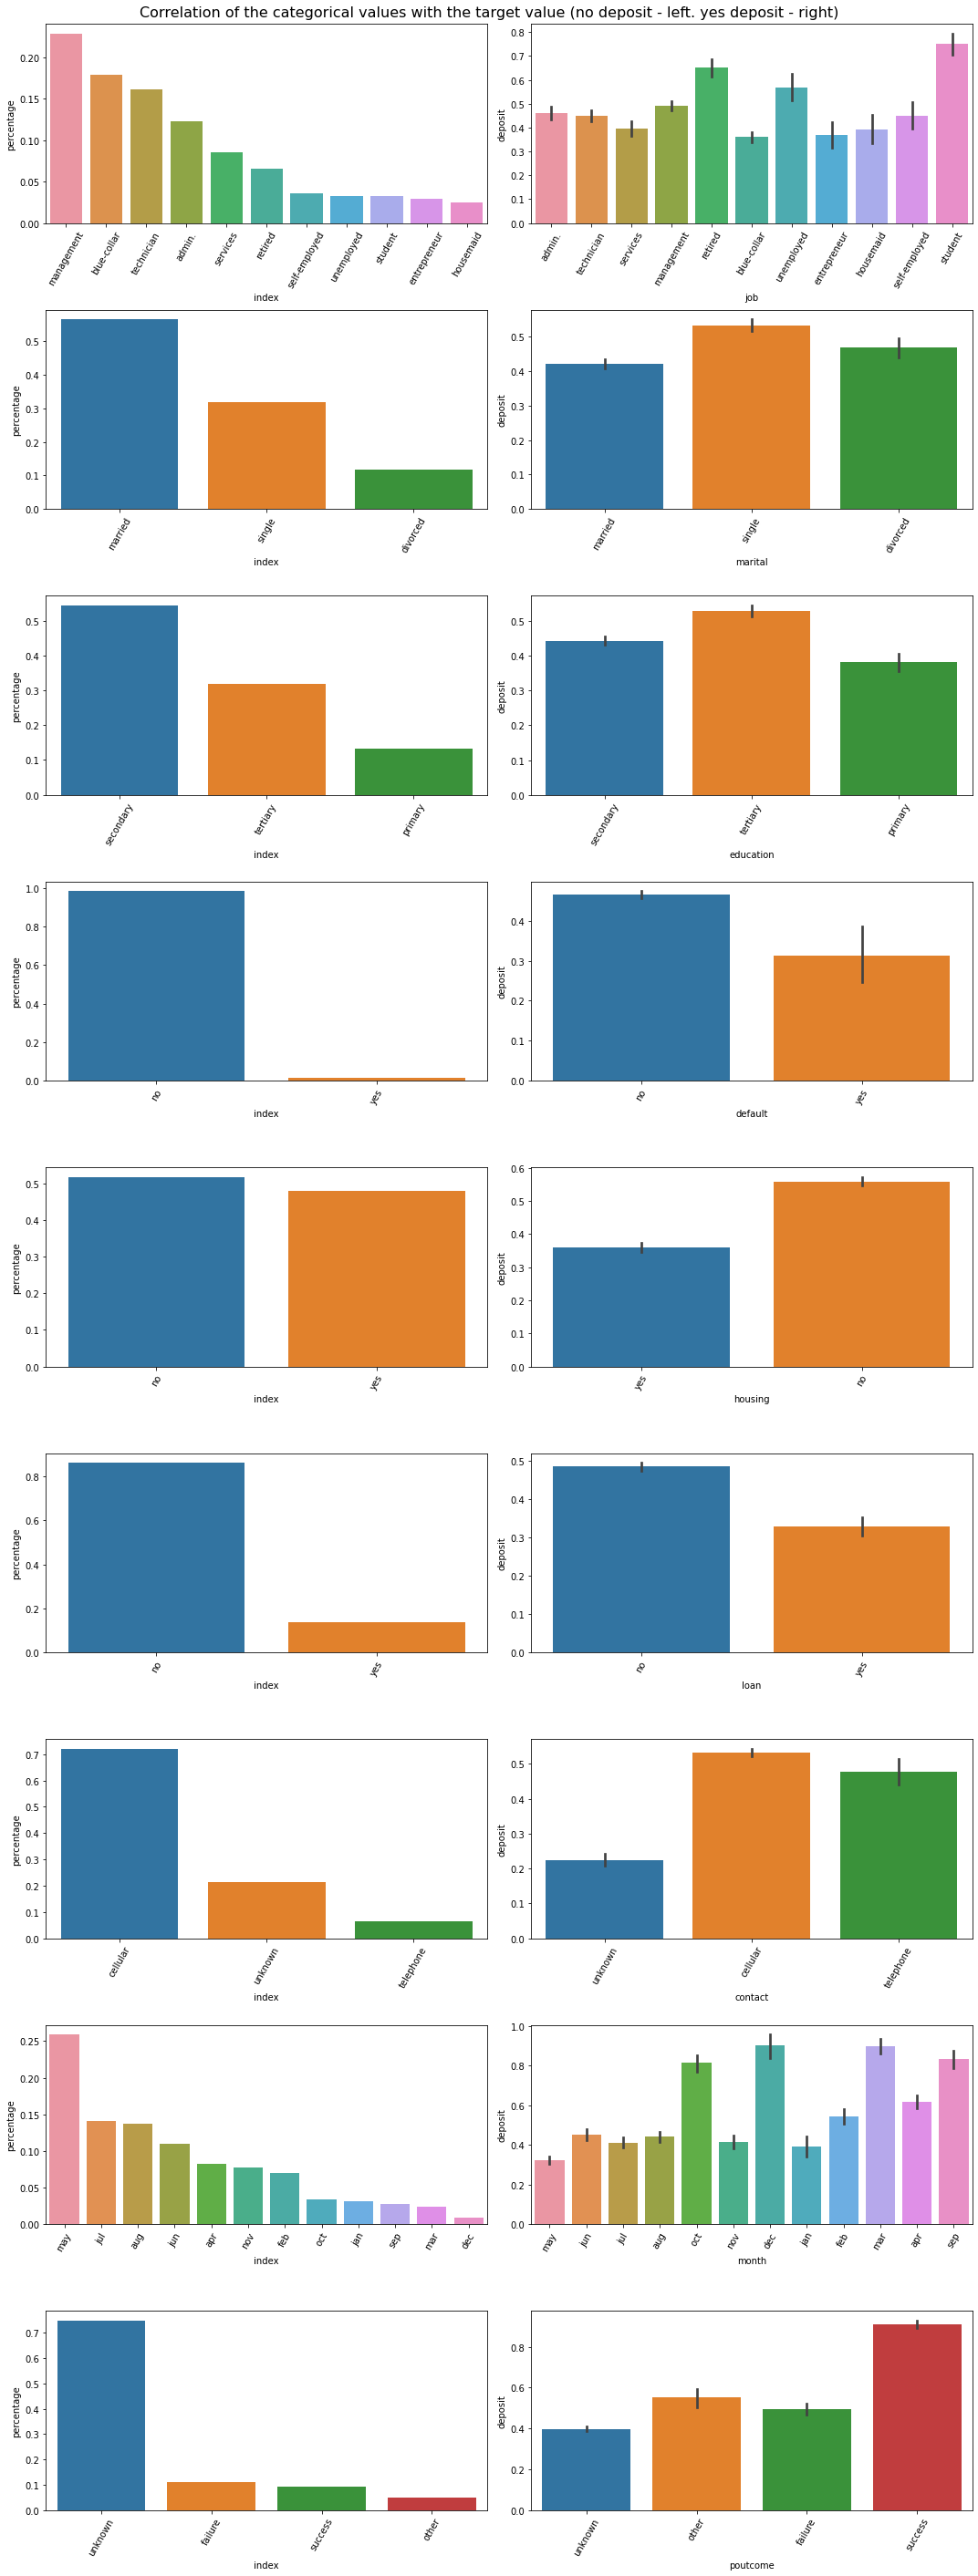

In [20]:
# Categorical values visualisation

data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

types = data.dtypes
cat_features = list(types[(types == 'object')].index)

n = len(cat_features) # number of the categorical values
fig, axes = plt.subplots(n, 2, figsize=(15, 40)) # figure+n*2 coordinate planes

# create a cicle for all values from the list of the categorical values
for i, feature in enumerate(cat_features):
    # create a bar plot forto display the relativity of each category
    count_data = (data[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index())
    count_barplot = sns.barplot(data=count_data, x='index', y='percentage', ax=axes[i][0])
    count_barplot.xaxis.set_tick_params(rotation=60)
    # create a bar plot to see the share of people who put the deposit depends on each category
    mean_barplot = sns.barplot(data=data, x=feature, y='deposit', ax=axes[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=60)
plt.tight_layout() # graph alignment

fig.suptitle('Correlation of the categorical values with the target value (no deposit - left. yes deposit - right)', size=16)
fig.subplots_adjust(top=0.973)
plt.show()

In [21]:
data['deposit'] = data['deposit'].apply(lambda x: 'yes' if x == 1 else 'no')

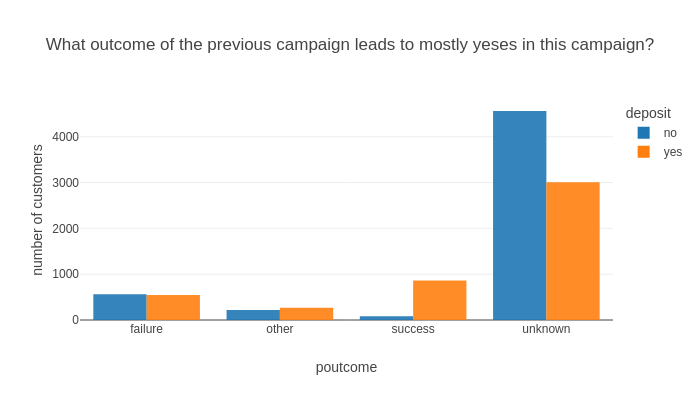

In [22]:
# The previous campaign (column 'poutcome') has four outcomes: failure, other, success, and unknown
# What outcome of the previous campaign leads to mostly yeses in this campaign?

bar_data = data.groupby(['poutcome', 'deposit'], as_index=False)[['balance']].count()
bar_data = bar_data.rename(columns={"balance": "number of customers"})

barchart = px.bar(
    data_frame=bar_data,
    x="poutcome",
    y="number of customers",
    color="deposit",
    opacity=0.9,
    orientation="v",
    barmode='group',
    title='What outcome of the previous campaign leads to mostly yeses in this campaign?',
    width=700,
    height=400,
    template='none'
)

barchart.show('png')

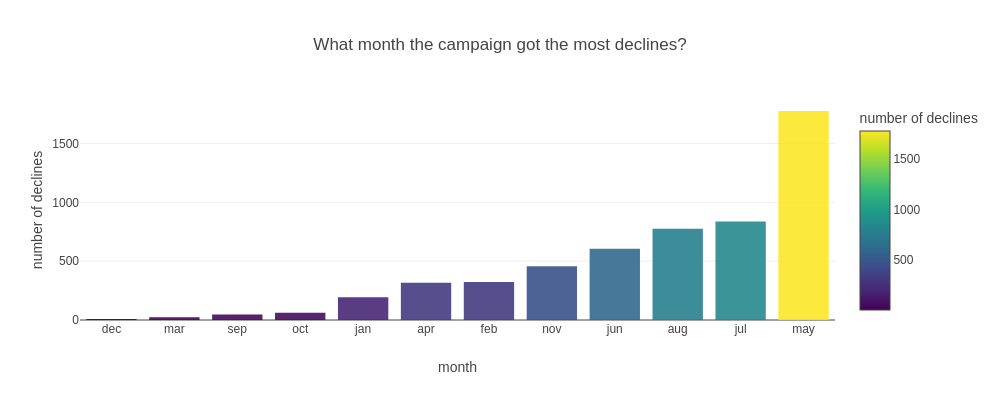

In [23]:
# Visualise in what month the campaign got the most negative outcomes

bar_data2 = data[data['deposit'] == 'no'].groupby(['month', 'deposit'], as_index=False)[['balance']].count().sort_values('balance')
bar_data2 = bar_data2.rename(columns={"balance": "number of declines"})

barchart2 = px.bar(
    data_frame=bar_data2,
    x="month",
    y="number of declines",
    color="number of declines",
    opacity=0.9,
    orientation="v",
    barmode='group',
    title='What month the campaign got the most declines?',
    width=1000,
    height=400,
    template='none'
)

barchart2.show('png')

In [24]:
# Creat a new categorical value based on the customers' ages

def get_age_group(age):
    if age <= 30:
        return '<30'
    elif 30 < age <= 40:
        return '30-40'
    elif 40 < age <= 50:
        return '40-50'
    elif 50 < age <= 60:
        return '50-60'
    else:
        return '60+'
data['age_group'] = data['age'].apply(get_age_group)

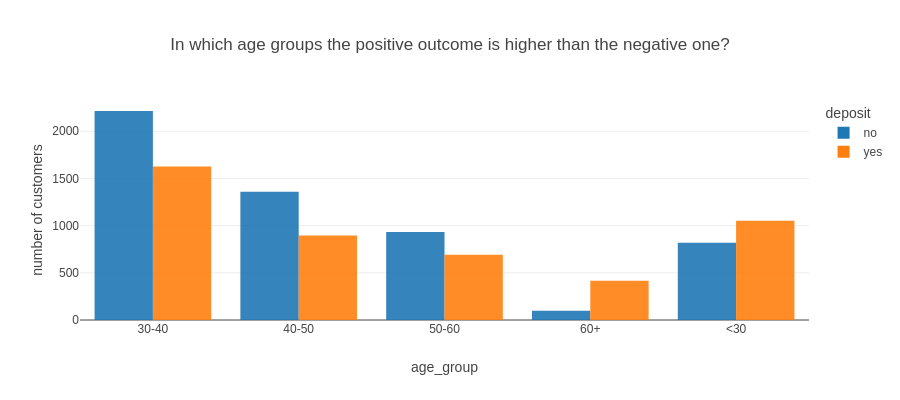

In [25]:
# Visualise in which age groups the positive outcome is higher than the negative one

bar_data3 = data.groupby(['age_group', 'deposit'], as_index=False)[['balance']].count()
bar_data3 = bar_data3.rename(columns={"balance": "number of customers"})

barchart3 = px.bar(
    data_frame=bar_data3,
    x="age_group",
    y="number of customers",
    color="deposit",
    opacity=0.9,
    orientation="v",
    barmode='group',
    title="In which age groups the positive outcome is higher than the negative one?",
    width=900,
    height=400,
    template='none'
)

barchart3.show('png')

In [26]:
# Visualise the results of the campaign in correlations with marital status

bar_data4 = data.groupby(['marital', 'deposit'], as_index=False)[['balance']].count()
bar_data4 = bar_data4.rename(columns={"balance": "number of customers"})

barchart4 = px.bar(
    data_frame=bar_data4,
    x="marital",
    y="number of customers",
    color="deposit",
    opacity=0.9,
    orientation="v",
    barmode='group',
    title="The campaign results in correlations with marital status",
    width=600,
    height=400,
    template='none'
)

barchart4.show()

In [27]:
# Visualise the results of the campaign in correlations with education

bar_data5 = data.groupby(['education', 'deposit'], as_index=False)[['balance']].count()
bar_data5 = bar_data5.rename(columns={"balance": "number of customers"})

barchart5 = px.bar(
    data_frame=bar_data5,
    x="education",
    y="number of customers",
    color="deposit",
    opacity=0.9,
    orientation="v",
    barmode='group',
    title="The campaign results depend on the education",
    width=600,
    height=400,
    template='none'
)

barchart5.show()

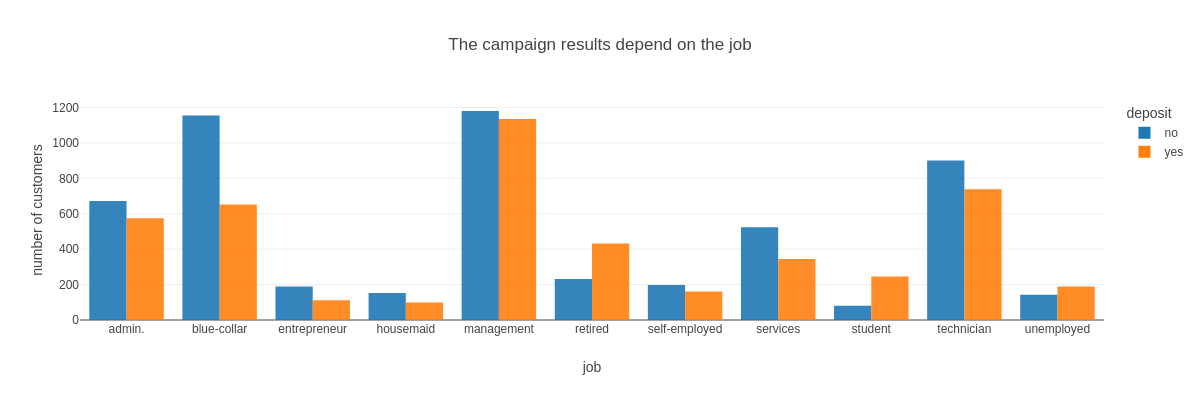

In [28]:
# Visualise the results of the campaign in correlations with job

bar_data6 = data.groupby(['job', 'deposit'], as_index=False)[['balance']].count()
bar_data6 = bar_data6.rename(columns={"balance": "number of customers"})

barchart6 = px.bar(
    data_frame=bar_data6,
    x="job",
    y="number of customers",
    color="deposit",
    opacity=0.9,
    orientation="v",
    barmode='group',
    title="The campaign results depend on the job",
    width=1200,
    height=400,
    template='none'
)

barchart6.show('png')

In [29]:
# Build a pivot table to see the number of those who opened deposits based on their marital status and education

mask = data[data['deposit'] == 'yes']

mask.pivot_table(
    values='deposit',
    index='marital',
    columns='education',
    aggfunc='count')

education,primary,secondary,tertiary
marital,,,
divorced,96,283,174
married,339,1289,784
single,82,879,755


## Part 3: Data Preprocessing

In [30]:
# Encode 'education'

Label_Encoder = preprocessing.LabelEncoder()
data['education'] = Label_Encoder.fit_transform(data['education'])

In [31]:
# Encode 'age group'

Label_Encoder = preprocessing.LabelEncoder()
data['age_group'] = Label_Encoder.fit_transform(data['age_group'])

In [32]:
# Preprocess binary values

data['default'] = data['default'].apply(lambda x: 1 if x == 'yes' else 0)
data['housing'] = data['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data['loan'] = data['loan'].apply(lambda x: 1 if x == 'yes' else 0)
data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [33]:
# Encode categorical values

categorical_columns_names = ['job', 'marital', 'contact', 'month', 'poutcome']
encoded_columns = pd.get_dummies(data, columns = categorical_columns_names)
encoded_columns = encoded_columns.drop(columns=['age', 'education', 'default', 
                                                'balance', 'housing', 'loan', 
                                                'day', 'duration', 'campaign', 
                                                'pdays', 'previous', 'deposit', 
                                                'age_group'])


In [34]:
encoded_data = pd.concat([data, encoded_columns], axis=1)
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   job                10105 non-null  object 
 2   marital            10105 non-null  object 
 3   education          10105 non-null  int64  
 4   default            10105 non-null  int64  
 5   balance            10105 non-null  float64
 6   housing            10105 non-null  int64  
 7   loan               10105 non-null  int64  
 8   contact            10105 non-null  object 
 9   day                10105 non-null  int64  
 10  month              10105 non-null  object 
 11  duration           10105 non-null  int64  
 12  campaign           10105 non-null  int64  
 13  pdays              10105 non-null  int64  
 14  previous           10105 non-null  int64  
 15  poutcome           10105 non-null  object 
 16  deposit            101

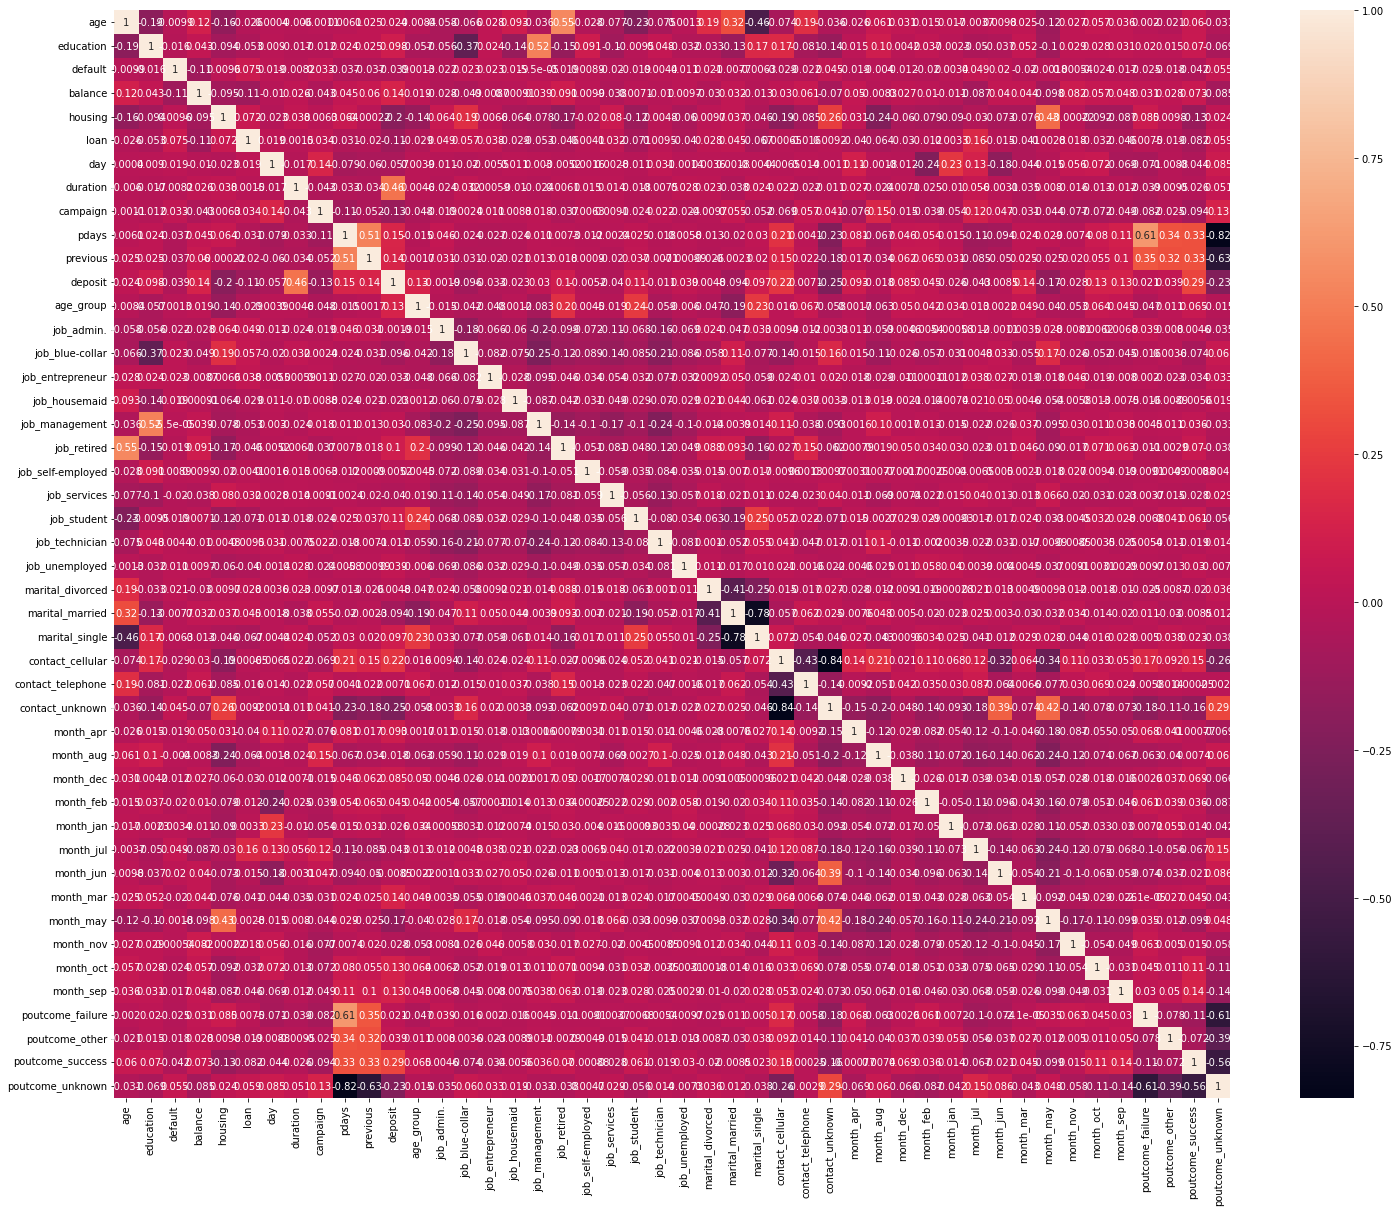

In [35]:
# Visualise the correlation matrix and asses multicollinearity

plt.figure(figsize = (25, 20))
sns.heatmap(encoded_data.corr(), annot = True);

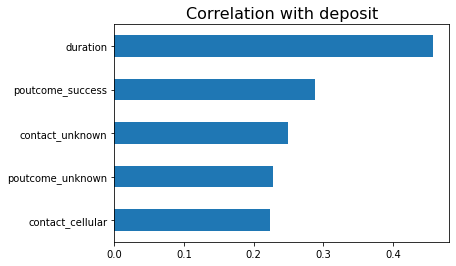

In [36]:
# Visualise correlation of the top 5 parametors with the target value ('deposit')

corr = encoded_data.corr() 

corr["deposit"].apply(lambda x: abs(x)).sort_values()[-6:-1].plot.barh()
plt.title("Correlation with deposit", fontsize = 16)
plt.show()

In [37]:
encoded_data = encoded_data.drop(['job', 'marital', 'contact', 'month', 'poutcome'], axis=1)

In [38]:
# Splits the dataframe into train and test samples with stratified sampling

X = encoded_data.drop(['deposit'], axis=1)
y = encoded_data['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [39]:
# Select 15 best features based on univariate statistical tests

selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)
selector.get_feature_names_out()

selected_cols = selector.get_feature_names_out()

selected_cols

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [40]:
# Leave the selected values

df = encoded_data[selected_cols]
df = pd.concat([df, y], axis=1)

In [41]:
# Splits the dataframe into train and test dataframes with stratified sampling

X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [42]:
# Scale the featured to the range between 0 and 1

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Part 4: Classification: Logistic Regression and Decision Tree

In [43]:
# Train logistic regression and calculate quality metrics

# creat a logistic regression class object
log_reg = linear_model.LogisticRegression(solver='sag', max_iter=1000, random_state=42)

# train a model
log_reg.fit(X_train_scaled, y_train)

# get the accuracy score
print("Test sample accuracy score is {:.2f}".format(log_reg.score(X_test_scaled, y_test)))

Test sample accuracy score is 0.81


In [44]:
# Train Decision Tree without max tree depth

# creat a Decision Tree Classifier class object
dt = tree.DecisionTreeClassifier(
    criterion='entropy', # informative criterion
    random_state=42
)

# train the tree using the CARrint algorithm
dt.fit(X_train_scaled, y_train)

# make class predictions and display the metric values
y_train_pred = dt.predict(X_train_scaled)
print('Train sample accuracy score is {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = dt.predict(X_test_scaled)
print('Test sample accuracy score is {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Train sample accuracy score is 1.00
Test sample accuracy score is 0.75


In [45]:
# Find the best min_samples_leaf and max_depth hyper-parameters for DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 7, 10]}

grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
print("Test sample accuracy score is {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
print("The best hyper-parameters are {}".format(grid_search.best_params_))

Test sample accuracy score is 0.81
The best hyper-parameters are {'max_depth': 7, 'min_samples_split': 2}


In [46]:
# Train Decision Tree using the selected hyper-parameters

dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    random_state=42
)

# train the tree using the CARrint algorithm
dt.fit(X_train_scaled, y_train)

# make class predictions and display the metric values
y_train_pred = dt.predict(X_train_scaled)
print('Train sample accuracy score is {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = dt.predict(X_test_scaled)
print('Test sample accuracy score is {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Test sample F1 score is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train sample accuracy score is 0.84
Test sample accuracy score is 0.81
Test sample F1 score is 0.80


## Part 5: Classification: Model Ensembles and Forecasting

In [47]:
# Train Random Forest and calculate quality metrics

# creat a Random Forest Classifier class object
rf = ensemble.RandomForestClassifier(
    n_estimators=100, # number of trees
    criterion='gini', # efficiency criterion
    max_depth=10, # max tree depth
    min_samples_leaf=5, # min number of objects in a leaf
    random_state=42
)

# train a model
rf.fit(X_train_scaled, y_train)

# make class predictions
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

# display the metric values
print('Test sample accuracy score is {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Test sample recall score is {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))

Test sample accuracy score is 0.83
Test sample recall score is 0.83


In [48]:
# Train Extreme Gradient Boosting and calculate quality metrics

from xgboost import XGBClassifier

# creat a class model prototype
xgb = XGBClassifier(n_estimators=300,
                                       learning_rate = 0.05,
                                       min_samples_leaf = 5,
                                       max_depth = 5,
                                       random_state = 42)

# train a model
xgb.fit(X_train_scaled, y_train)

# model validation on the test sample
y_test_pred = xgb.predict(X_test_scaled)

# display the metrics value
print('Test sample F1 score is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

[15:04:41] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Test sample F1 score is 0.82


In [49]:
# Join the previously used techniques with stacking

from sklearn.ensemble import StackingClassifier

# create a list of tuples:
estimators = [
    ('dt', tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=2, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.05, min_samples_leaf=5, max_depth=5, random_state=42))
]

# creat a Stacking class object
reg = StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(solver='sag', max_iter=1000, random_state=42))

# train a model
reg.fit(X_train_scaled, y_train)

# display the metrics value
y_pred_stack = reg.predict(X_test_scaled)
print('Test sample precision score is {:.2f}'.format(metrics.precision_score(y_test, y_pred_stack)))

[15:04:44] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:04:47] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:04:50] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actual

<AxesSubplot:>

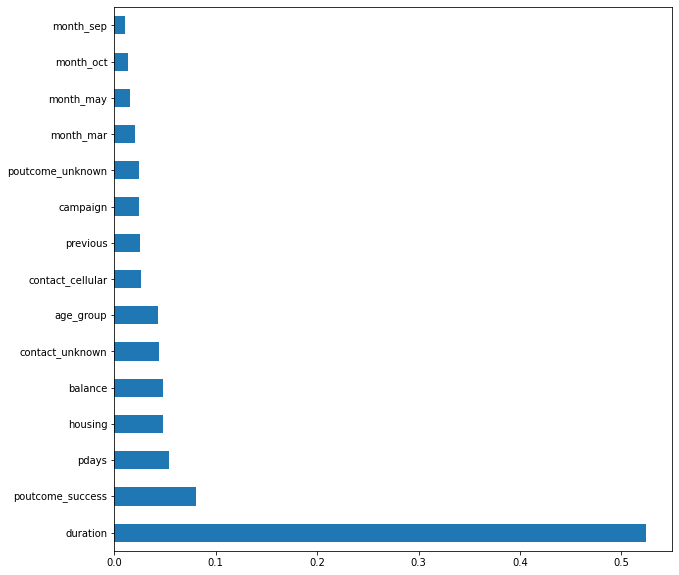

In [50]:
# See what values are most important for the gradient boosting model

plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [51]:
# Optimize the hyper-parameters using Optuna

import optuna

def optuna_rf(trial):
  # set hyperparameter search spaces
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  # create a model
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # train the model
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))
  return score

# create a study object setting that we need to mazimize the metric
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# looking for the best combination of hyperparameters for n_trials times
study.optimize(optuna_rf, n_trials=20)

# displaying the results on the training sample
print("The best hyperparameters are {}".format(study.best_params))
print("Train sample F1 score is {:.2f}".format(study.best_value))

# calculate the results for the test sample
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42,)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("Test sample accuracy score is {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('Test sample F1 score is {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

[I 2022-07-02 15:05:05,014] A new study created in memory with name: RandomForestClassifier
[I 2022-07-02 15:05:05,980] Trial 0 finished with value: 0.8544204935957513 and parameters: {'n_estimators': 185, 'max_depth': 28, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8544204935957513.
[I 2022-07-02 15:05:06,708] Trial 1 finished with value: 0.8529411764705882 and parameters: {'n_estimators': 139, 'max_depth': 18, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8544204935957513.
[I 2022-07-02 15:05:07,800] Trial 2 finished with value: 0.9234156313885831 and parameters: {'n_estimators': 166, 'max_depth': 30, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9234156313885831.
[I 2022-07-02 15:05:08,762] Trial 3 finished with value: 0.8463468171840703 and parameters: {'n_estimators': 188, 'max_depth': 17, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.9234156313885831.
[I 2022-07-02 15:05:09,681] Trial 4 finished with value: 0.892991239048811 and parameters: {'n_

The best hyperparameters are {'n_estimators': 166, 'max_depth': 30, 'min_samples_leaf': 2}
Train sample F1 score is 0.92
Test sample accuracy score is 0.83
Test sample F1 score is 0.82
